In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
%matplotlib inline

# 1.

In [3]:
rows = ['A','B','C','D','E']
columns = ['2016','2017','2018','2019','2020']
values = np.array([10000.0,20000.0,30000.0,40000.0,60000.0])
temp = [values]
for i in range(4):
    values = values-(values*0.07)
    temp.append(values)

df = pd.DataFrame(temp,rows,columns)
df


2016        2017        2018        2019        2020
A  10000.0000  20000.0000  30000.0000  40000.0000  60000.0000
B   9300.0000  18600.0000  27900.0000  37200.0000  55800.0000
C   8649.0000  17298.0000  25947.0000  34596.0000  51894.0000
D   8043.5700  16087.1400  24130.7100  32174.2800  48261.4200
E   7480.5201  14961.0402  22441.5603  29922.0804  44883.1206

# 2. 

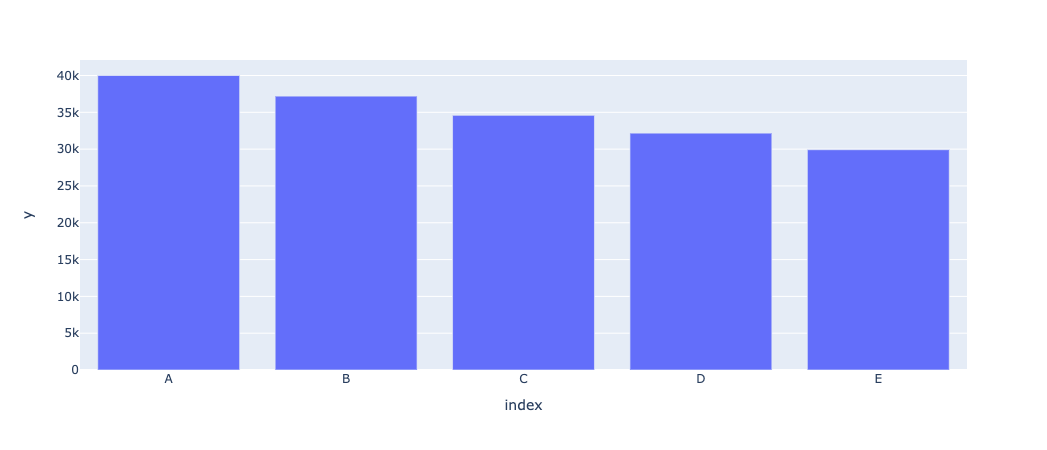

In [4]:
df2 = df['2017'].apply(lambda x : x*2)
fig = px.bar(df,x=df2.index,y=df2)
fig.show()

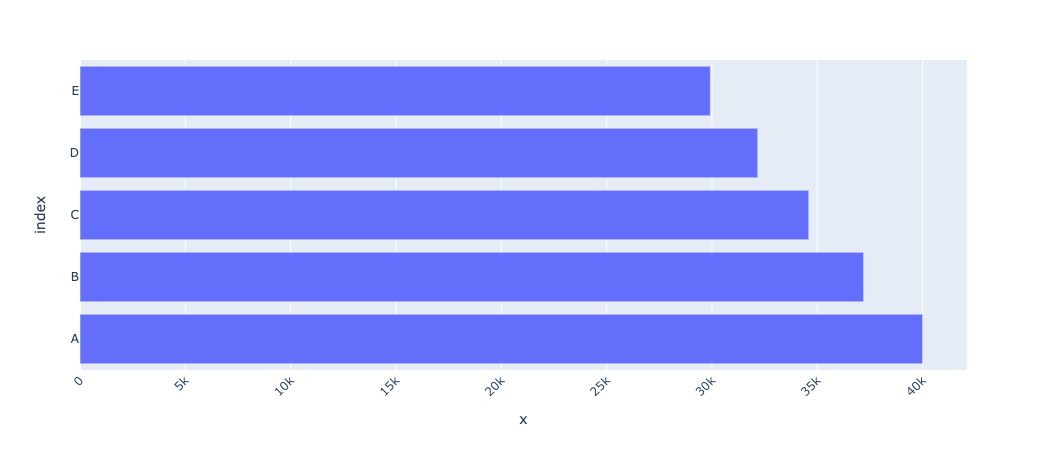

In [5]:
df2 = df['2017'].apply(lambda x : x*2)
fig = px.bar(df,x=df2,y=df2.index)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# 3.

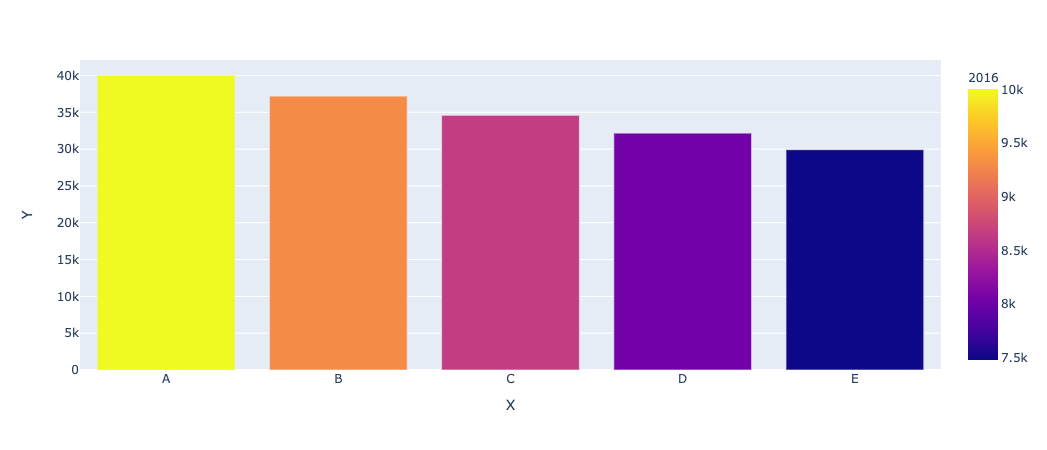

In [6]:
df2 = df['2017'].apply(lambda x : x*2)
fig = px.bar(df,x=df2.index,y=df2,color='2016',labels={'y':'Y','index':'X'},hover_data=['2017','2018','2019','2020'])
fig.show()

In [7]:
df.mean(axis=0)

2016     8694.61802
2017    17389.23604
2018    26083.85406
2019    34778.47208
2020    52167.70812
dtype: float64

# 4.

In [8]:
df4 = pd.read_csv('train.csv')
df4

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

       PassengerId  Survived  Pclass  SibSp  Parch      Fare
Age                                                         
0.42         804.0       1.0     3.0    0.0    1.0    8.5167
0.67         756.0       1.0     2.0    1.0    1.0   14.5000
0.75         557.5       1.0     3.0    2.0    1.0   19.2583
0.83         455.5       1.0     2.0    0.5    1.5   23.8750
0.92         306.0       1.0     1.0    1.0    2.0  151.5500
...            ...       ...     ...    ...    ...       ...
70.00        709.5       0.0     1.5    0.5    0.5   40.7500
70.50        117.0       0.0     3.0    0.0    0.0    7.7500
71.00        295.5       0.0     1.0    0.0    0.0   42.0792
74.00        852.0       0.0     3.0    0.0    0.0    7.7750
80.00        631.0       1.0     1.0    0.0    0.0   30.0000

[88 rows x 6 columns]


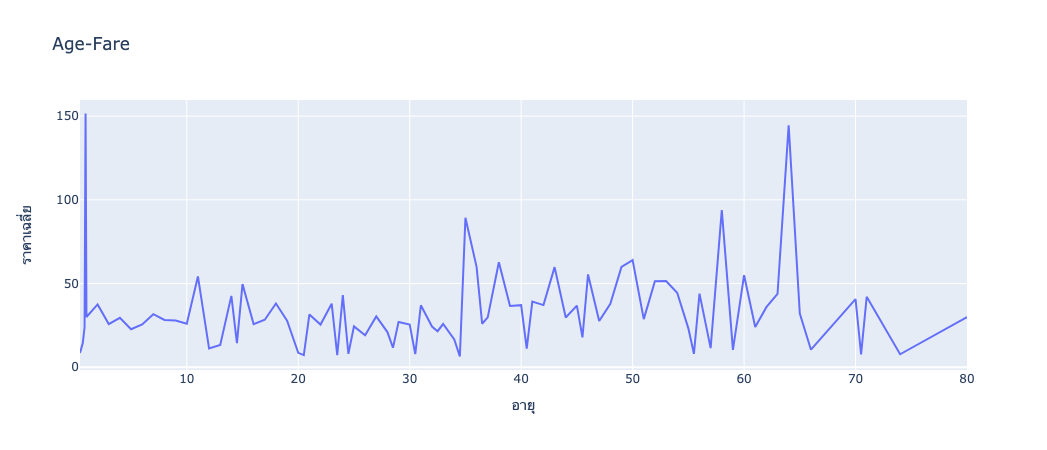

In [9]:
df_age = df4.groupby('Age').mean()
print(df_age)
fig = px.line(df4,x=df_age.index,y=df_age['Fare'],title='Age-Fare',labels={'x':'อายุ','y':'ราคาเฉลี่ย'})
fig.show()

# 5.

        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550


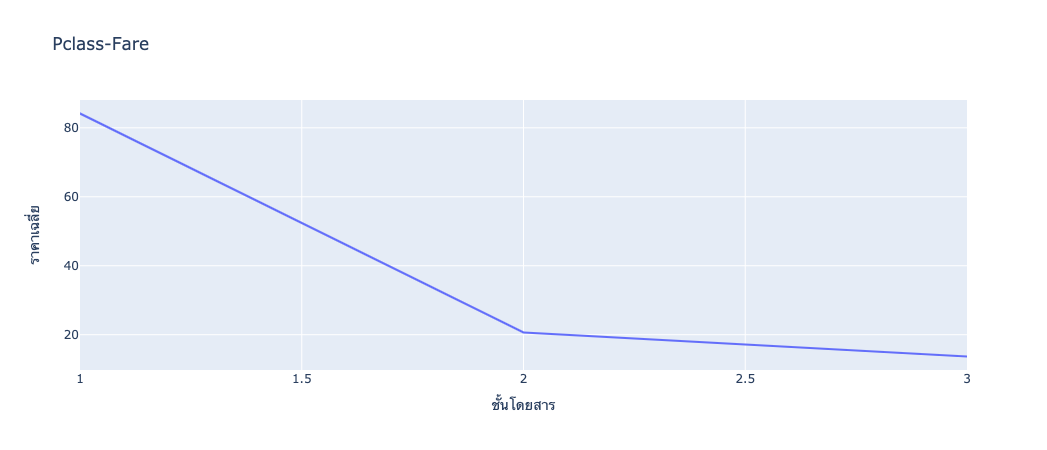

In [10]:
df_pclass = df4.groupby('Pclass').mean()
print(df_pclass)
fig = px.line(df4,x=df_pclass.index,y=df_pclass['Fare'],title='Pclass-Fare',labels={'x':'ชั้นโดยสาร','y':'ราคาเฉลี่ย'})
fig.show()

# 6.

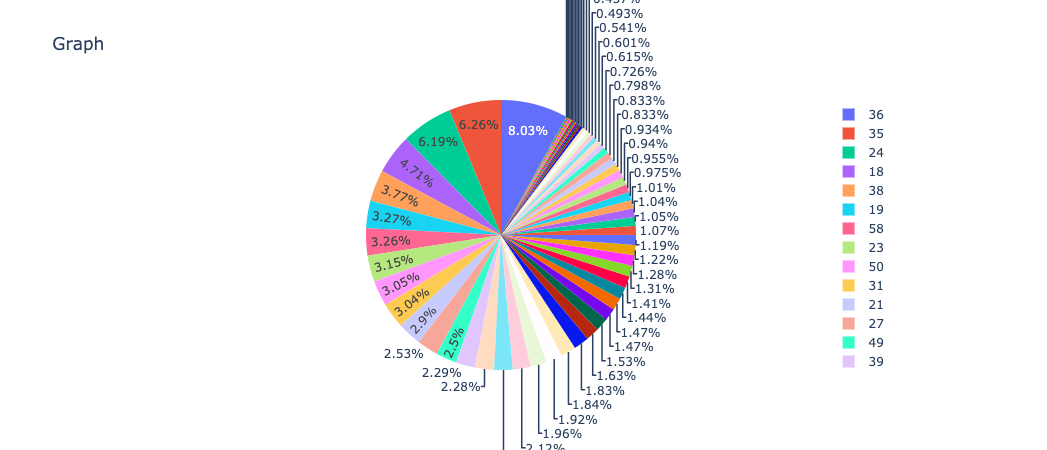

In [17]:
fig = px.pie(df4.dropna(),values='Fare',names='Age',title='Graph')
fig.show()

# 7.

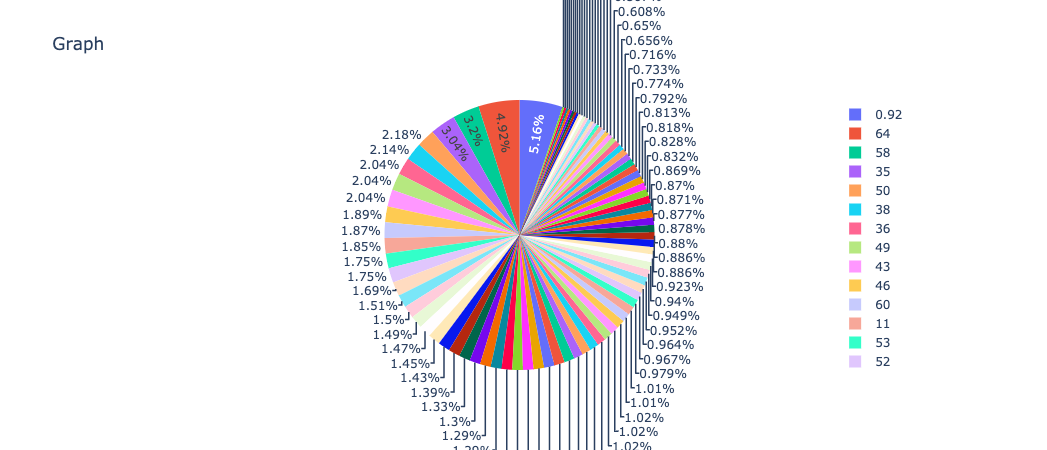

In [18]:
df7 = df4.groupby('Age').mean()
fig = px.pie(df7,values='Fare',names=df7.index,title='Graph')
fig.show()

# 8.

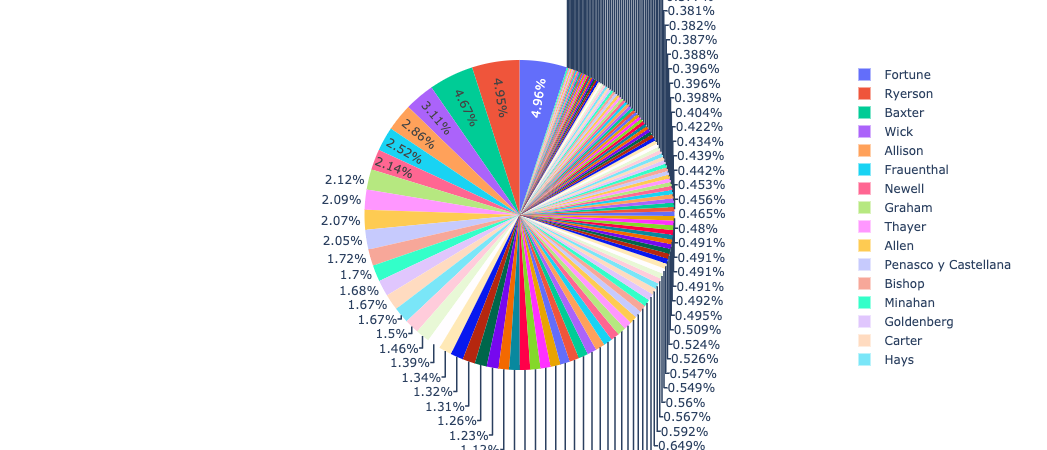

In [81]:
df4['Surname'] = df4['Name'].apply(lambda x : x.split(',')[0])
df_duplicated = df4[df4['Surname'].duplicated(keep=False)]
df_surname = df_duplicated.groupby('Surname').mean()

fig = px.pie(df_surname,values='Fare',names=df_surname.index)
fig.show()

# 9.

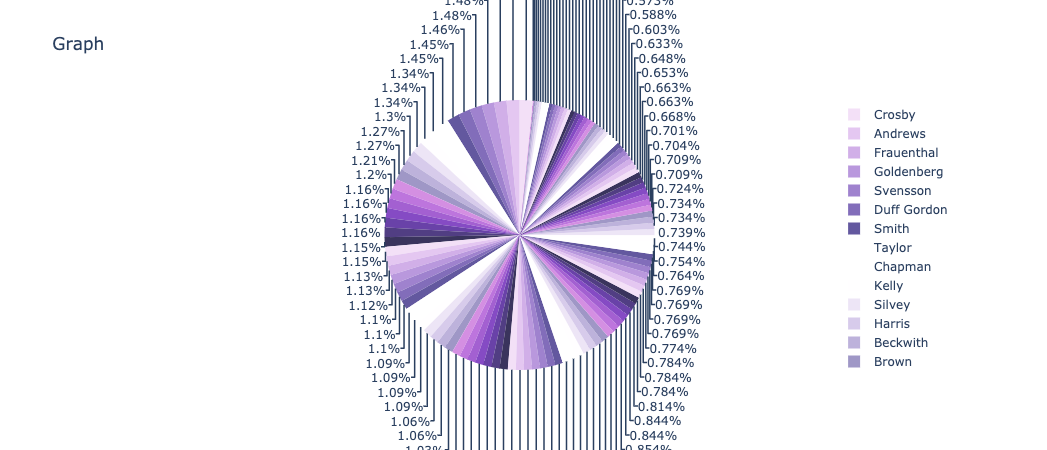

In [96]:
df4['Surname'] = df4['Name'].apply(lambda x : x.split(',')[0])
df_duplicated = df4[df4['Surname'].duplicated(keep=False)]
df_surname = df_duplicated.groupby('Surname').mean()

fig = px.pie(df_surname,values='Age',names=df_surname.index,title='Graph',color_discrete_sequence=px.colors.sequential.Purp)
fig.show()

# 10.

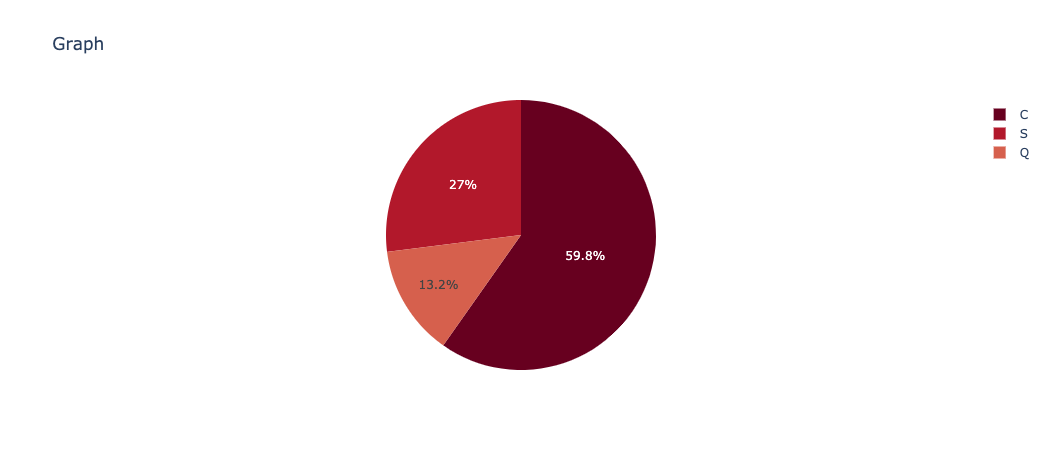

In [105]:

df_embarked = df4.groupby('Embarked').mean()
df_embarked
fig = px.pie(df_embarked,values='Fare',names=df_embarked.index,title='Graph',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# 11.

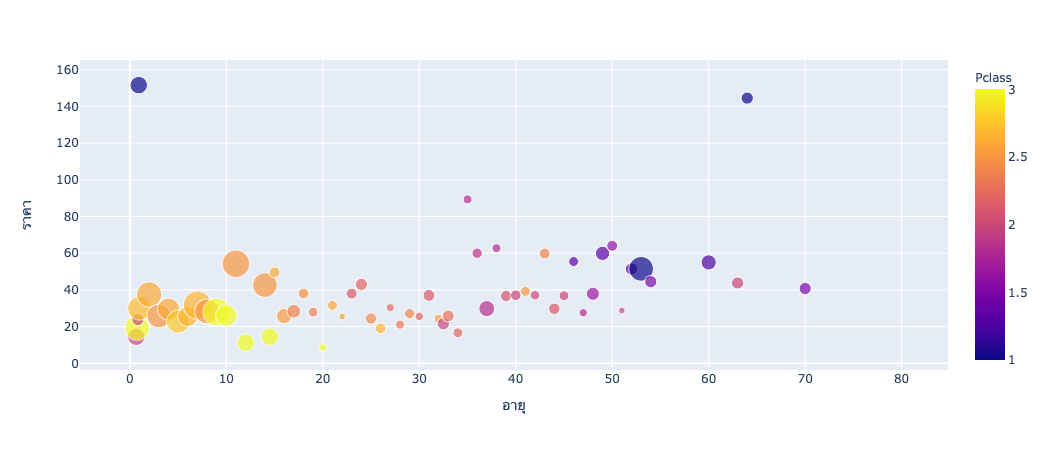

In [102]:
df11 = df4.groupby('Age').mean()

fig = px.scatter(df11,x=df11.index,y='Fare',size='SibSp',labels={'Age':'อายุ','Fare':'ราคา'},color='Pclass')
fig.show()

# 12.

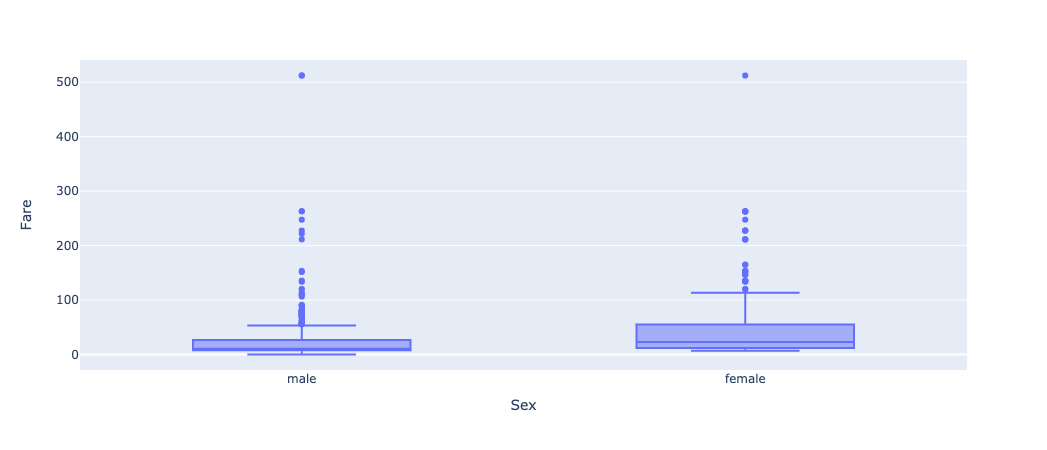

In [106]:
fig = px.box(df4,x='Sex',y='Fare')
fig.show()

# 13.

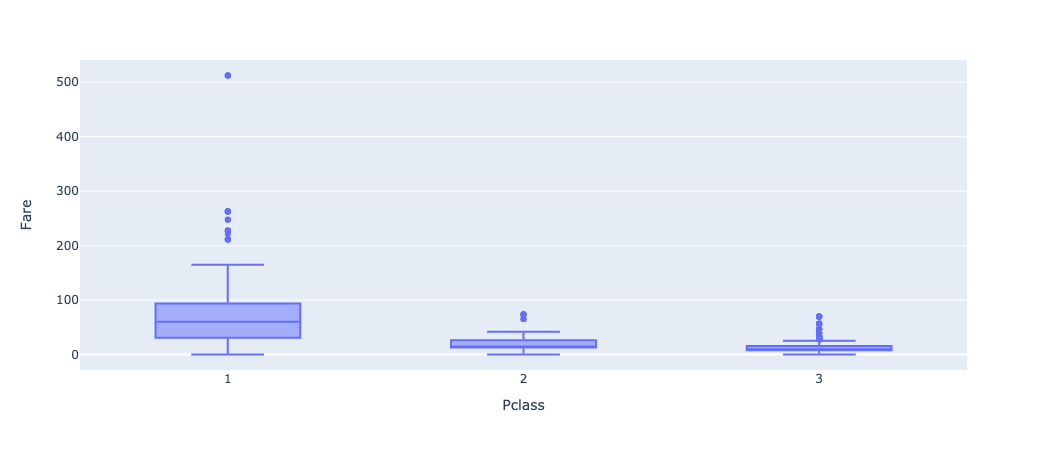

In [112]:
fig = px.box(df4,x='Pclass',y='Fare')
fig.show()

# 14.

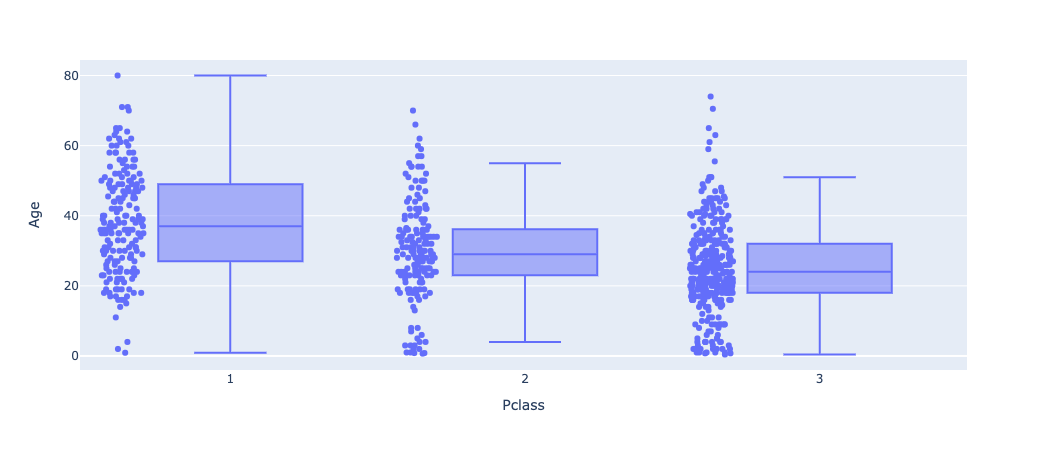

In [111]:
fig = px.box(df4,x='Pclass',y='Age',points='all')
fig.show()

# 15.

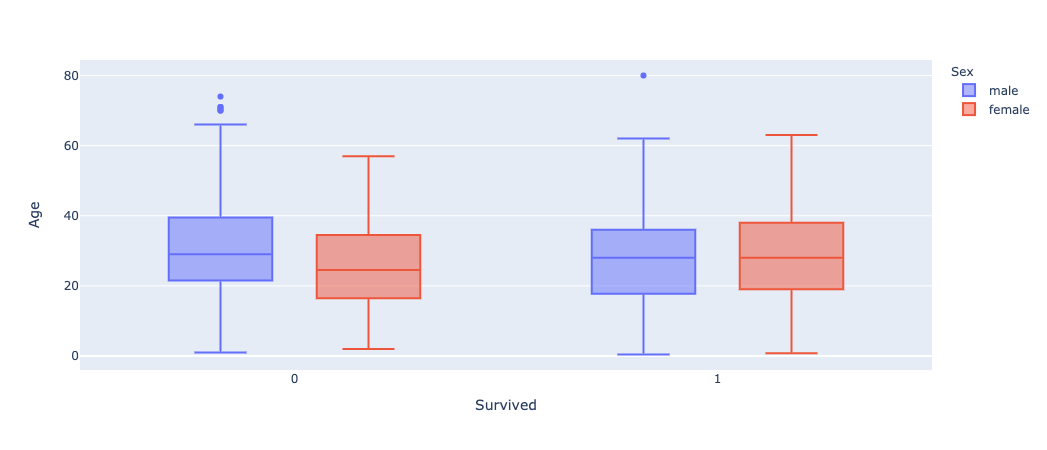

In [113]:
fig = px.box(df4,x='Survived',y='Age',color='Sex')
fig.show()

# 16.

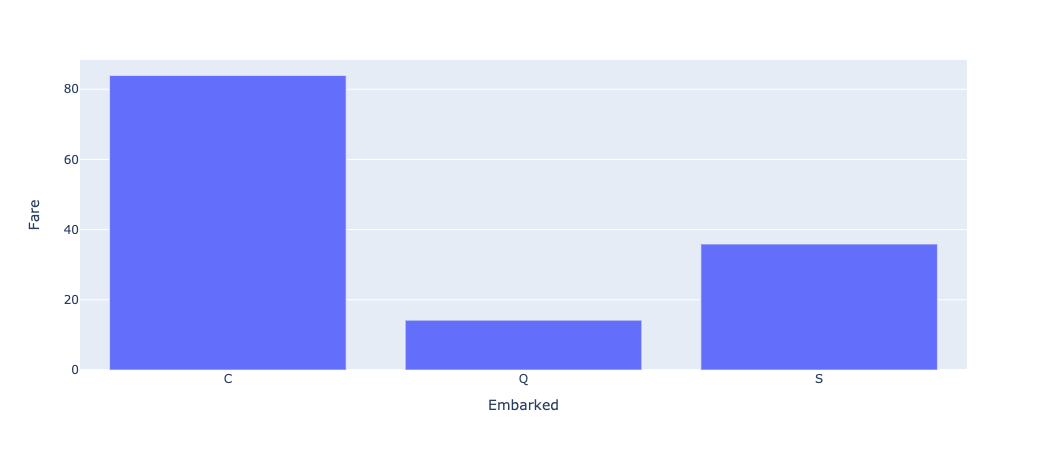

In [119]:
df16 = df4.groupby('Embarked').std()
fig = px.bar(df16,x=df16.index,y='Fare')
fig.show()

# 17.

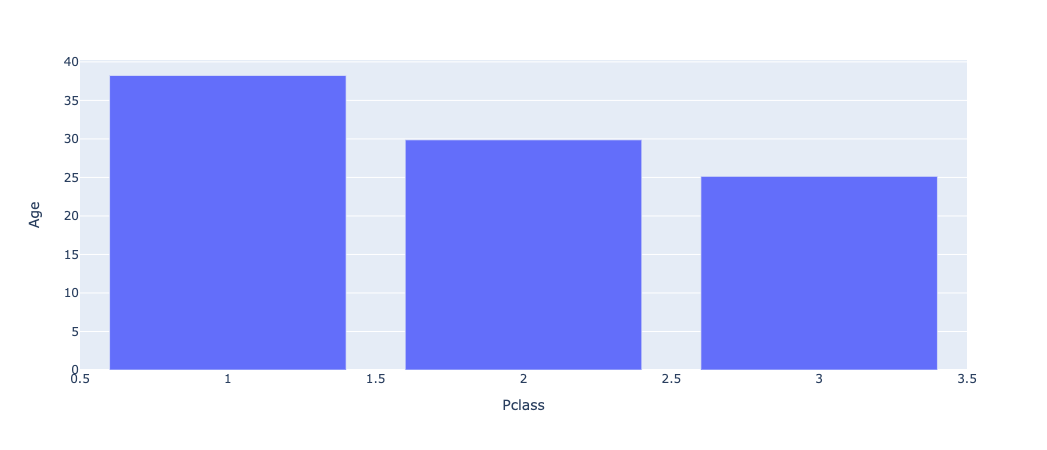

In [120]:
df17 = df4.groupby('Pclass').mean()
fig = px.bar(df17,x=df17.index,y='Age')
fig.show()

# 18.

In [121]:
df18 = df4.pivot_table(index='Pclass',columns='Sex',values='Fare')
df18

Sex         female       male
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633

In [122]:
import plotly.graph_objects as go

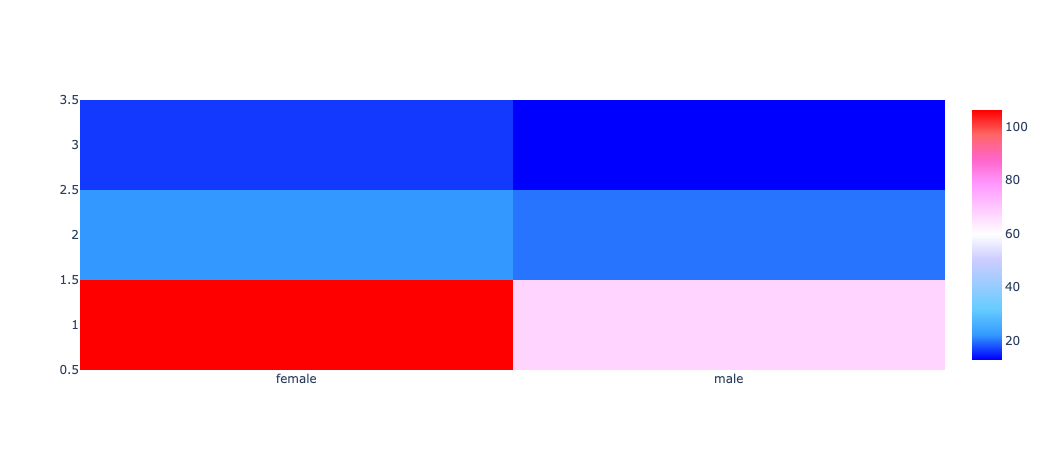

In [123]:
fig = go.Figure(data=go.Heatmap(z=df18,x=df18.columns,y=df18.index,colorscale='picnic'))
fig.show()

# 19.

In [126]:
df19 = df4.corr()

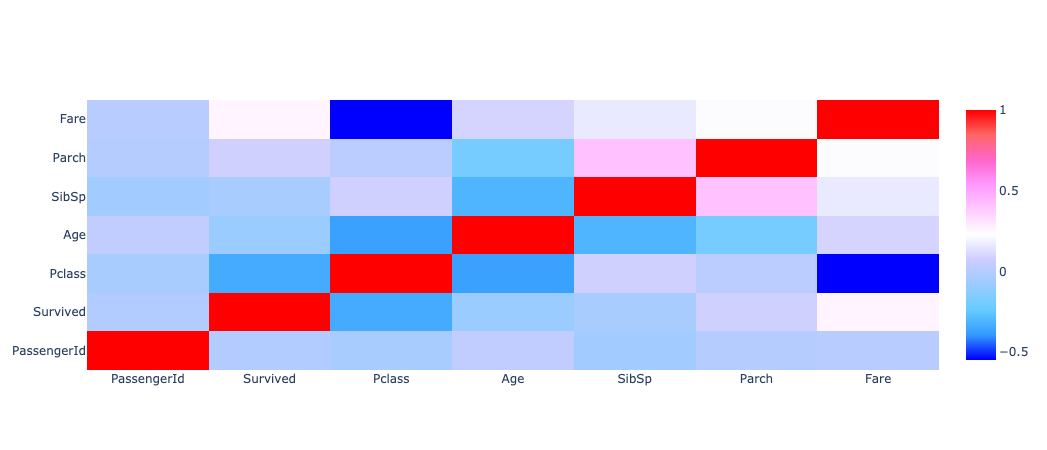

In [127]:
fig = go.Figure(data=go.Heatmap(z=df19,x=df19.index,y=df19.index,colorscale='picnic'))
fig.show()

# 20.

In [149]:
df20 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df20.columns :
    df20[col] = df20[col].astype(str)
df20['text'] = df20['state'] + '<br>' + \
                'Total exports' + df20['total exports'] + '<br>' + \
                'Total veggies' + df20['total veggies'] + '<br>' + \
                'Total fruit' + df20['total fruits']
df20.head()

code       state category total exports   beef  pork poultry   dairy  \
0   AL     Alabama    state       1390.63   34.4  10.6   481.0    4.06   
1   AK      Alaska    state         13.31    0.2   0.1     0.0    0.19   
2   AZ     Arizona    state       1463.17   71.3  17.9     0.0  105.48   
3   AR    Arkansas    state       3586.02   53.2  29.4   562.9    3.53   
4   CA  California    state      16472.88  228.7  11.1   225.4  929.95   

  fruits fresh fruits proc total fruits veggies fresh veggies proc  \
0          8.0        17.1        25.11           5.5          8.9   
1          0.0         0.0          0.0           0.6          1.0   
2         19.3        41.0        60.27         147.5        239.4   
3          2.2         4.7         6.88           4.4          7.1   
4       2791.8      5944.6       8736.4         803.2       1303.5   

  total veggies  corn  wheat   cotton  \
0         14.33  34.9   70.0   317.61   
1          1.56   0.0    0.0      0.0   
2        386.91   7.3   48.7   423.95   
3         11.45  69.5  114.5   665.44   
4       2106.79  34.6  249.3  1064.95   

                                                text  
0  Alabama<br>Total exports1390.63<br>Total veggi...  
1  Alaska<br>Total exports13.31<br>Total veggies1...  
2  Arizona<br>Total exports1463.17<br>Total veggi...  
3  Arkansas<br>Total exports3586.02<br>Total vegg...  
4  California<br>Total exports16472.88<br>Total v...

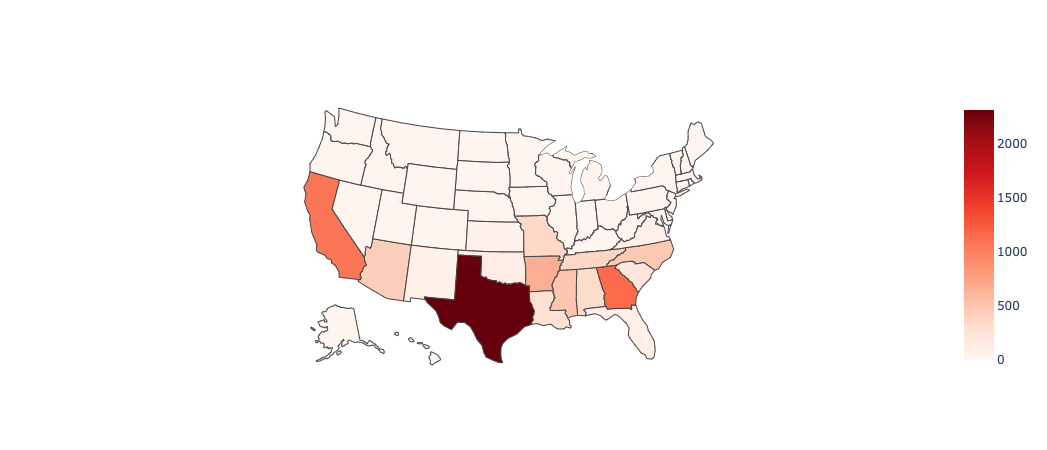

In [150]:
fig = go.Figure(data=go.Choropleth(locations=df20['code'],z=df20['cotton'].astype(float),locationmode='USA-states',colorscale='Reds',text=df20['text']))
fig.update_layout(geo_scope='usa')
fig.show()

# 21.

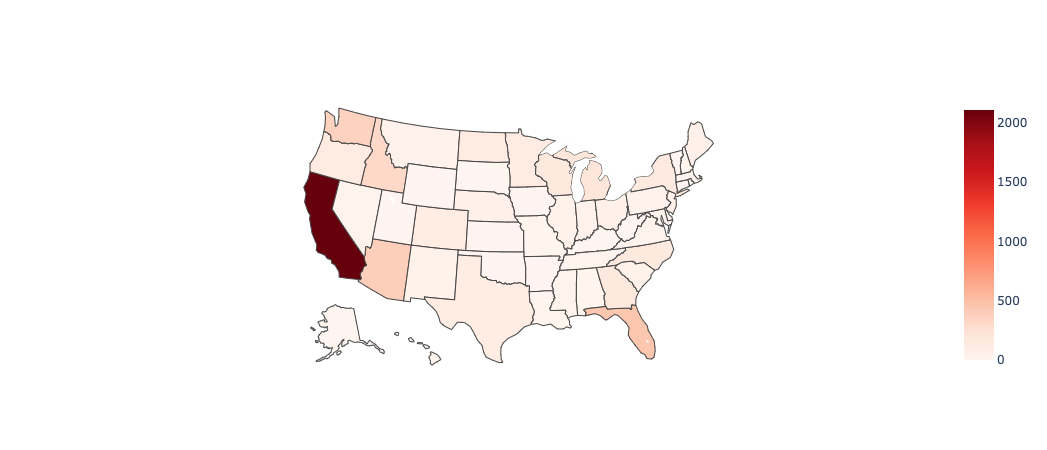

In [166]:
df21 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

df21['beef/pork'] = (df21['beef']/df21['pork']).round(2)

for col in df21.columns :
    df21[col] = df21[col].astype(str)
df21['text'] = df21['state'] + '<br>' + \
                'Beef/Pork ' + df21['beef/pork']
df21.head()

fig = go.Figure(data=go.Choropleth(locations=df21['code'],z=df21['total veggies'].astype(float),locationmode='USA-states',colorscale='Reds',text=df21['text']))
fig.update_layout(geo_scope='usa')
fig.show()

# 22.

In [180]:
df22 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

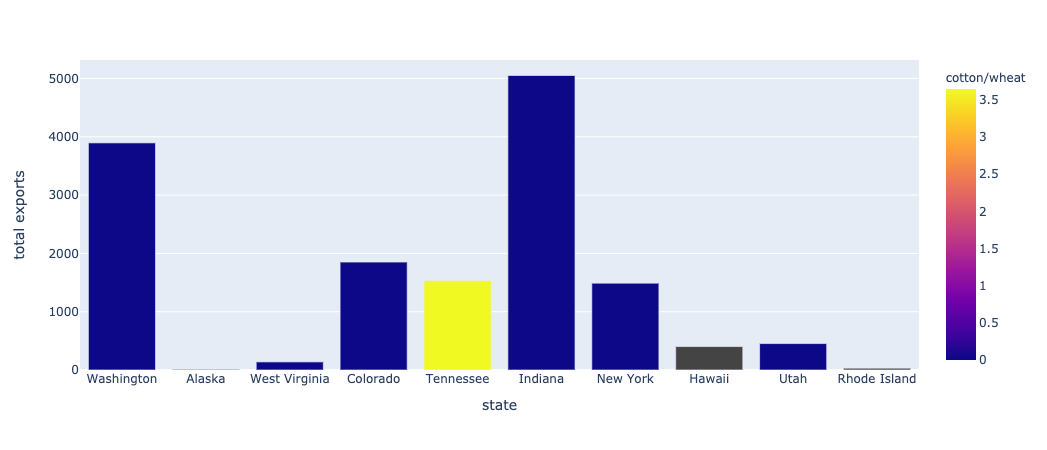

In [181]:
df22['cotton/wheat'] = df22['cotton']/df22['wheat']
samples = df22.sample(10)

fig = px.bar(samples, x= samples['state'], y= samples['total exports'], color= samples['cotton/wheat'])
fig.show()